#### First import the important library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [5]:
df=pd.read_csv("healthcare_dataset1.csv")

In [6]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,31/01/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,328,Urgent,02/02/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,20/08/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,265,Emergency,26/08/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,22/09/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,205,Emergency,07/10/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,18/11/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,450,Elective,18/12/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,19/09/2022,Kathleen Hanna,White-White,Aetna,14238.31781,458,Urgent,09/10/2022,Penicillin,Abnormal


1. Data cleaning
2. EDA
3. Pre processing
4. Algorithms
5. website
6. github
7. Free deploy

# Data cleaning

In [7]:
df.shape

(55500, 15)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [9]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [10]:
df.duplicated().sum()

534

#### first we remove the duplicates

In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
df.sample(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
54410,MICHAeL COLE,70,Male,A-,Cancer,30/09/2020,Kevin Tucker,Gibson Ltd,Medicare,38848.387850,187,Urgent,29/10/2020,Lipitor,Inconclusive
2434,caLVIN SToKes,81,Female,A-,Diabetes,14/05/2022,Jeffrey Edwards,"Franklin Gentry and Kennedy,",Aetna,43279.727770,309,Emergency,22/05/2022,Paracetamol,Normal
25653,jesSICA WhItE,26,Female,B+,Cancer,25/12/2022,Dr. Robert Green PhD,Group Miller,Aetna,38188.044370,329,Elective,22/01/2023,Paracetamol,Inconclusive
9407,JAred BrowN,36,Male,AB+,Hypertension,08/03/2021,Daniel Dunn,Rodriguez-Gutierrez,Blue Cross,2339.754076,249,Urgent,03/04/2021,Ibuprofen,Abnormal
11210,ROsE lEWIs,76,Male,A+,Arthritis,12/11/2020,Lydia Lopez,"Coffey, Stone Gibson and",Aetna,22080.467560,186,Emergency,21/11/2020,Paracetamol,Abnormal


In [14]:
df.drop(['Name','Date of Admission','Doctor','Hospital','Room Number','Discharge Date'],axis='columns',inplace=True)

In [15]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.28131,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,33643.32729,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.09608,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,37909.78241,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.31781,Urgent,Penicillin,Abnormal


# EDA

In [16]:
df['Gender'].value_counts()

Male      27496
Female    27470
Name: Gender, dtype: int64

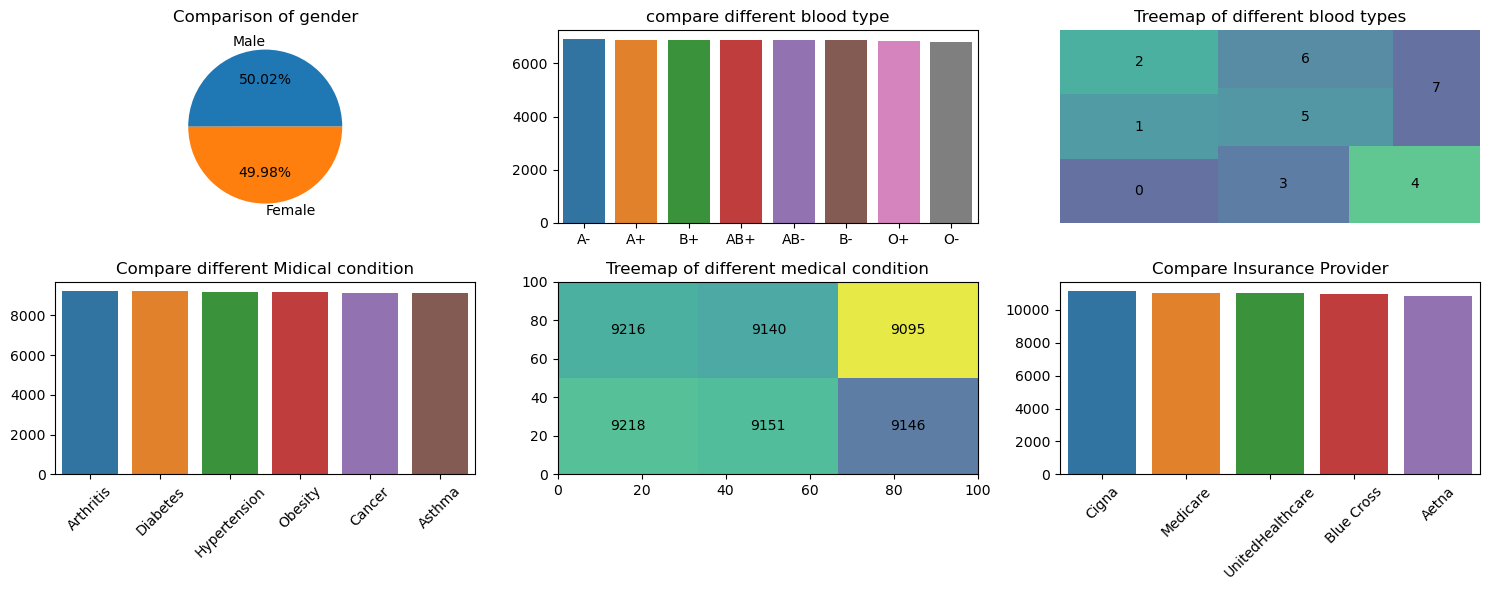

In [17]:
fig,axis=plt.subplots(2,3,figsize=(15,6))
axis[0,0].pie(df['Gender'].value_counts(),autopct="%0.2f%%",labels=['Male','Female'])
axis[0,0].set_title("Comparison of gender")

sns.barplot(x=df['Blood Type'].value_counts().index,y=df['Blood Type'].value_counts().values,ax=axis[0,1])
axis[0,1].set_title("compare different blood type")


# Treemap for blood type comparison
sizes = df['Blood Type'].value_counts().values.tolist()
labels = df['Blood Type'].index.tolist()

squarify.plot(sizes=sizes, label=labels, alpha=.8, ax=axis[0, 2])
axis[0, 2].set_title("Treemap of different blood types")
axis[0, 2].axis('off')  # Remove axes for better visualization

sns.barplot(x=df['Medical Condition'].value_counts().index,y=df['Medical Condition'].value_counts().values,ax=axis[1,0])
axis[1,0].set_title("Compare different Midical condition")
axis[1,0].set_xticklabels(df['Medical Condition'].value_counts().index, rotation=45)


size=df['Medical Condition'].value_counts().values.tolist()
labelss=df['Medical Condition'].value_counts().values.tolist()

squarify.plot(sizes=size,label=labelss,alpha=0.8,ax=axis[1,1])
axis[1,1].set_title("Treemap of different medical condition")

sns.barplot(x=df['Insurance Provider'].value_counts().index,y=df['Insurance Provider'].value_counts().values,ax=axis[1,2])
axis[1,2].set_title("Compare Insurance Provider")
axis[1,2].set_xticklabels(df['Insurance Provider'].value_counts().index,rotation=45)


plt.tight_layout()
plt.show()

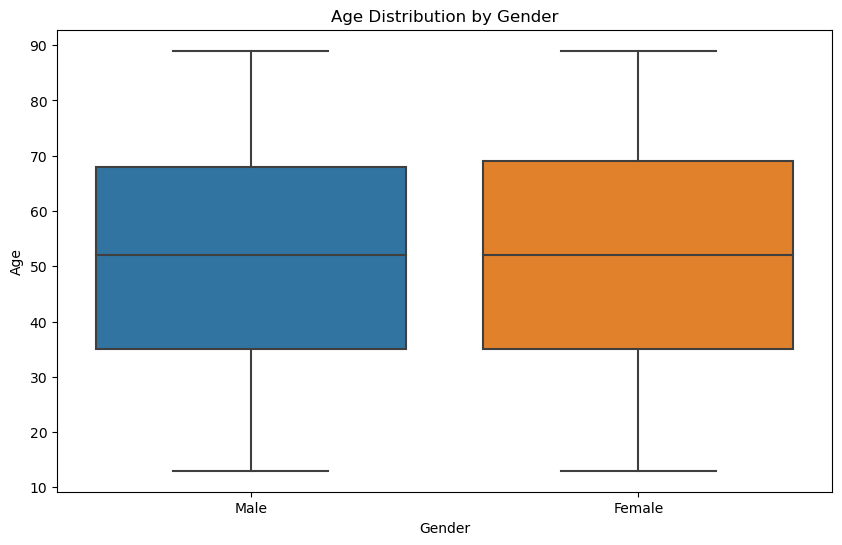

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

# Box plot for age distribution by gender
sns.boxplot(x='Gender', y='Age', data=df, ax=ax)
ax.set_title("Age Distribution by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Age")

plt.show()

Using Crosstab
<p>A crosstab will show the total billing amount by gender.

In [19]:
crosstab_result = pd.crosstab(index=df['Gender'], columns='Total', values=df['Billing Amount'], aggfunc='sum')
print(crosstab_result)

col_0          Total
Gender              
Female  6.997735e+08
Male    7.042949e+08


<h1>_________________________________________________________

Using Pivot Table
<p>A pivot table can also be used to summarize data.

In [20]:
pivot_result = df.pivot_table(values='Billing Amount', index='Gender', aggfunc='sum')
print(pivot_result)

        Billing Amount
Gender                
Female    6.997735e+08
Male      7.042949e+08


<h1> _______________________________________________________________

Using Group By
<p>Group by is another way to aggregate data by categories.

In [21]:
groupby_result = df.groupby('Gender')['Billing Amount'].sum().reset_index()
print(groupby_result)

   Gender  Billing Amount
0  Female    6.997735e+08
1    Male    7.042949e+08


<h1> __________________________________________________

Visualization
<p>To visualize the results, you can use a bar plot.

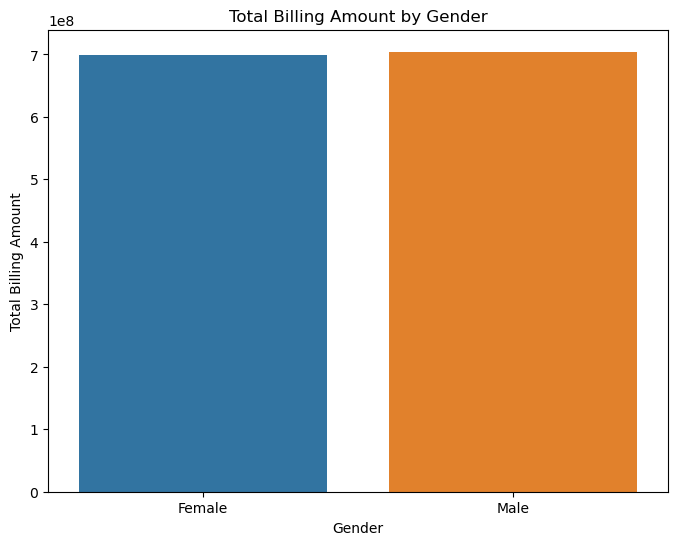

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Using Group By result for visualization
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Gender', y='Billing Amount', data=groupby_result, ax=ax)
ax.set_title("Total Billing Amount by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Total Billing Amount")
plt.show()

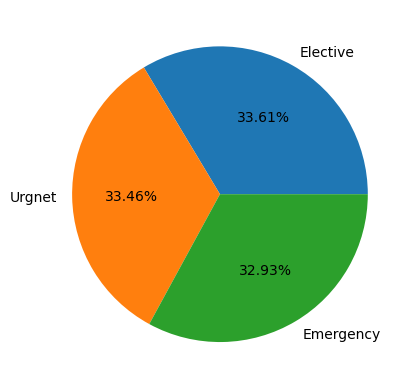

In [23]:
plt.pie(df['Admission Type'].value_counts(),labels=['Elective',"Urgnet","Emergency"],autopct="%0.2f%%")
plt.show()

In [24]:
df['Medication'].value_counts()

Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: Medication, dtype: int64

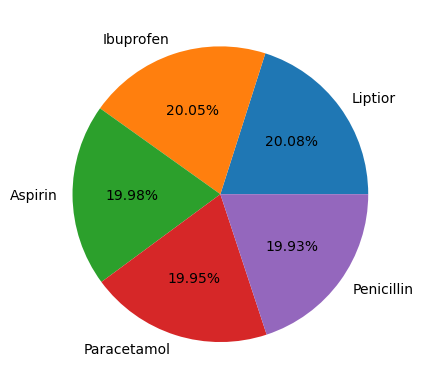

In [25]:
plt.pie(df['Medication'].value_counts(),labels=['Liptior',"Ibuprofen","Aspirin","Paracetamol","Penicillin"],autopct="%0.2f%%")
plt.show()

In [26]:
df['Test Results'].value_counts()

Abnormal        18437
Normal          18331
Inconclusive    18198
Name: Test Results, dtype: int64

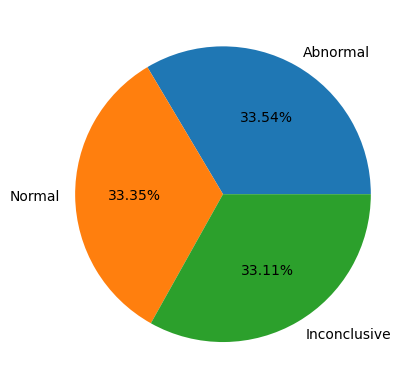

In [27]:
plt.pie(df['Test Results'].value_counts(),labels=['Abnormal',"Normal","Inconclusive"],autopct="%0.2f%%")
plt.show()

In [28]:
crosstab_result = pd.crosstab(index=df['Gender'], columns=df['Test Results'])
print("Crosstab Result:\n", crosstab_result)

Crosstab Result:
 Test Results  Abnormal  Inconclusive  Normal
Gender                                      
Female            9247          9143    9080
Male              9190          9055    9251


In [29]:
groupby_result = df.groupby(['Gender', 'Test Results']).size().unstack(fill_value=0)
print("\nGroup By Result:\n", groupby_result)


Group By Result:
 Test Results  Abnormal  Inconclusive  Normal
Gender                                      
Female            9247          9143    9080
Male              9190          9055    9251


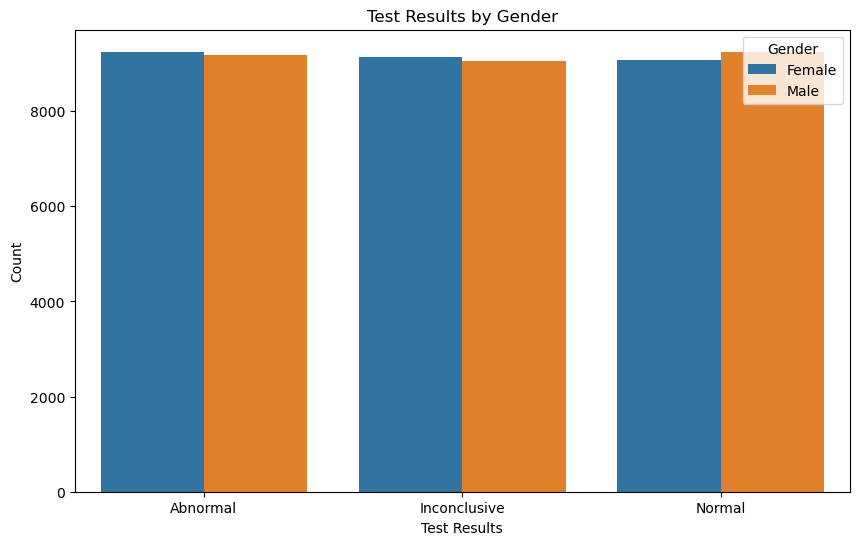

In [30]:
# Reshape the crosstab result for visualization
crosstab_result_melted = crosstab_result.reset_index().melt(id_vars='Gender', var_name='Test Results', value_name='Count')

# Using Crosstab result for visualization
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Test Results', y='Count', hue='Gender', data=crosstab_result_melted, ax=ax)
ax.set_title("Test Results by Gender")
ax.set_xlabel("Test Results")
ax.set_ylabel("Count")
plt.show()

In [31]:
pd.crosstab(df['Gender'],df['Insurance Provider'],normalize='columns')*100

Insurance Provider,Aetna,Blue Cross,Cigna,Medicare,UnitedHealthcare
Gender,,,,,
Female,49.251525,50.356099,50.21097,50.067941,49.981841
Male,50.748475,49.643901,49.78903,49.932059,50.018159


# Pre processing

In [32]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.28131,Urgent,Paracetamol,Normal
1,62,Male,A+,Obesity,Medicare,33643.32729,Emergency,Ibuprofen,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.09608,Emergency,Aspirin,Normal
3,28,Female,O+,Diabetes,Medicare,37909.78241,Elective,Ibuprofen,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.31781,Urgent,Penicillin,Abnormal


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
encoder=LabelEncoder()

In [35]:
df['Test Results']=encoder.fit_transform(df['Test Results'])

In [36]:
df.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.28131,Urgent,Paracetamol,2
1,62,Male,A+,Obesity,Medicare,33643.32729,Emergency,Ibuprofen,1
2,76,Female,A-,Obesity,Aetna,27955.09608,Emergency,Aspirin,2
3,28,Female,O+,Diabetes,Medicare,37909.78241,Elective,Ibuprofen,0
4,43,Female,AB+,Cancer,Aetna,14238.31781,Urgent,Penicillin,0


In [37]:
x=df.drop(columns="Test Results")
y=df['Test Results']

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [39]:
trf1=ColumnTransformer([
    ("ohe",OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,2,3,4,6,7])
],remainder="passthrough")

In [57]:
trf2=RandomForestClassifier(n_estimators=100, random_state=42)

### Create pipline

In [58]:
pipe=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2)
])

In [59]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 6, 7])])),
                ('trf2', RandomForestClassifier(random_state=42))])

In [60]:
# Predict
y_pred = pipe.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4147867850385679

In [63]:
import pickle
pickle.dump(pipe,open("pipe.pkl","wb"))